In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from math import*
from graphviz import Digraph
from sklearn.model_selection import train_test_split

In [28]:
import copy

In [29]:
target="result"

In [30]:
from pandas.io.parsers.readers import read_csv
data=pd.read_csv("/content/lenses.csv")
data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#data[target]=data[target].str.strip()

,age,spectacle,astigmatic,tear,result
0,young,myope,fine,reduced,no
1,young,myope,fine,normal,yes
2,young,myope,notfine,reduced,no
3,young,myope,notfine,normal,no
4,young,hypermetrope,fine,reduced,no
5,young,hypermetrope,fine,normal,yes
6,young,hypermetrope,notfine,reduced,no
7,young,hypermetrope,notfine,normal,no
8,pre-presbyopic,myope,fine,reduced,no
9,pre-presbyopic,myope,fine,normal,yes


In [31]:
#test_data=pd.read_csv("/content/anv.csv")

In [32]:
df2=pd.DataFrame(data)



In [33]:
df, testing_data = train_test_split(df2, test_size=0.3)
print(len(df),len(testing_data))

16 8


In [34]:
bin=df[target].unique()
print(bin)

['no' 'yes']


In [35]:
class node:
  def __init__ (self,ig,name):
    self.ig=ig
    self.name=name
    self.child=[]
    self.edges=[]
  def insert_child(self,node):
    self.child.append(node)
  def insert_edge(self,node):
    self.edges.append(node)

In [36]:
# IDEA COPIED FROM SIDDHARTHA
def node_test(df,main_root):
  out=[]
  node=main_root
  for i in range (len(df)):
    v=df.iloc[i].to_dict()
    out.append(node_next_test(v,node))
  return out
    
  




In [37]:
# IDEA COPIED FROM SIDDHARTHA
def node_next_test(ins,node):
  if  node.child==[] :
    return node.name
  val=ins[node.name]
  try:
    ind=node.edges.index(val)
    return node_next_test(ins,node.child[ind])
  except:
    return "Not valid instance"


In [38]:
def entropy(pos,n):
  p=pos/n
  if p==1 or p==0:
    return 0
  return -p*log(p,2)-((1-p)*log(1-p,2))

In [39]:
def informationGain(p,n,lt):
  ig= entropy(p)
  for i in range(len(lt)):
    ig -=(lt[i][0]*entropy(lt[i][1]))/n
  return ig

In [40]:
a=list(df.columns)
a.remove(target)
print(a)

['age', 'spectacle', 'astigmatic', 'tear']


In [41]:
g=Digraph()
cnt=0
main_root=None

In [42]:
def decision(df):
  global bin
  global main_root
  # STORING INFORMATION GAIN
  maxentropy =[-1,""]
  c1=df[df[target]==bin[0]].count()[0]
  e=entropy(c1,df.count()[0])
  z=list(df.columns)
  a=copy.deepcopy(z)
  #DELETING PARENT ROOT FROM COLUMN
  a.remove(target)
  for i in a:
    u=df[i].unique()
    sum=0
    for j in u:
      c=df[df[i]==j][df[target]==bin[0]].count()[0]
      e1=entropy(c,df[df[i]==j].count()[0])*df[df[i]==j].count()[0]/df.count()[0]
      sum+=e1
    f=e-sum
    # print(i,f)
    if maxentropy[0]<f:
      maxentropy=[f,i]
  # CREATING NODE FOR MAX IG ATTRIBUTE
  nd=node(maxentropy[0],maxentropy[1])
  root=node(maxentropy[0],maxentropy[1])
  main_root=root
  g.node(maxentropy[1],maxentropy[1])
  a.remove(root.name)
  #PASSING NODE TO FIND NEXT NODE
  next_node(df,a,root)
  


In [43]:
def next_node(df,a,parent):
  global cnt
  
  c1=df[target].value_counts()[bin[0]]
  e=entropy(c1,df.count()[0])
  temp=df
  val=list(df[parent.name].unique())
  for j in val:
    df=temp
    df=df[df[parent.name]==j]
    e=entropy(df[df[target]==bin[0]].count()[0],df.count()[0])
    if e==0:
      for d in range(len(bin)):
        if df[df[target]==bin[d]].count()[0]==df.count()[0]:
          value=bin[d]
      # if df[df[target]==bin[0]].count()[0]==df.count()[0]:
      #   value=bin[0]
      # else:
      #   value=bin[1]
      g.node(value+str(cnt),value)
      parent.insert_edge(j)
      nd=node(0,value)
      parent.insert_child(nd)
      g.edge(parent.name,value+str(cnt),label=j)  
      cnt+=1
      continue
    maxentropy =[-1,""]
    for i in a:
      sum=0
      u=df[i].unique()
      for k in u:
        c=df[df[i]==k][df[target]==bin[0]].count()[0]        
        e1=entropy(c,df[df[i]==k].count()[0])*df[df[i]==k].count()[0]/df.count()[0]
        sum+=e1
      f=e-sum
      
      if maxentropy[0]<f:
        maxentropy=[f,i]

    nd=node(maxentropy[0],maxentropy[1])
    #print(parent.name,j,nd.name)
    g.node(maxentropy[1],maxentropy[1])
    parent.insert_child(nd)
    parent.insert_edge(j)
    g.edge(parent.name,maxentropy[1],label=j)

    

    a2=copy.deepcopy(a)
    a2.remove(nd.name)
    next_node(df[df[parent.name]==j],a2,nd)



In [44]:
decision(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


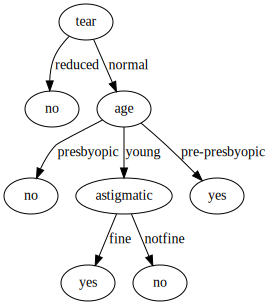

In [45]:
g

In [46]:
print(g.source)
# print(df2)

digraph {
	tear [label=tear]
	no0 [label=no]
	tear -> no0 [label=reduced]
	age [label=age]
	tear -> age [label=normal]
	no1 [label=no]
	age -> no1 [label=presbyopic]
	astigmatic [label=astigmatic]
	age -> astigmatic [label=young]
	yes2 [label=yes]
	astigmatic -> yes2 [label=fine]
	no3 [label=no]
	astigmatic -> no3 [label=notfine]
	yes4 [label=yes]
	age -> yes4 [label="pre-presbyopic"]
}


In [47]:
l=node_test(testing_data,main_root)
print(l)

['no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no']


In [56]:
def accuracy(pred,orig):
  a=len(orig)
  correct=0
  for i in range(a):
    if orig[i]==pred[i]:
      correct+=1
  return (correct/a)*100



In [58]:
print("Accuracy Of Model:", accuracy(l,testing_data[target].tolist()))

Accuracy Of Model: 62.5


In [57]:
# print(testing_data[target].tolist())
